In [46]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
import pandas
%matplotlib notebook

In [47]:
alpha = 0.1
def beta(beta):
    nul1 = (1 + alpha)*4 - ((4 + 1*1.6 - 2*0.5 - 3*0.2) + 2*beta)
    return nul1
beta = fsolve(beta, alpha)[0]
MMX = 1*12 + 1.6*1 + 0.5*16 + 0.2*14

In [48]:
Data = np.array(pandas.read_csv('Chemostat\Aon 1998\Aon 1998 cX.csv', header = None))
D = Data[:,0]
cX = Data[:,1]/MMX # g/l na cmol/l
rE = Data[:,2]/1000*MMX # mmol/g/h na cmolE/cmolX/h
theta = 0

PO = 1.5

In [49]:
gammalys = []

for i in range(0, len(D)):
    def Energy(var):
        gamma = var
        mu = D[i]
        S = np.matrix([[-1, 1 + alpha, 1,   1,    0,    0,   0],
                       [0,  0,         0,   -1,   1,    3/2, 0],
                       [0,  beta,      2,   0,    -1/3, 0,   -2],
                       [0,  -gamma,    2/3, -1/3, 0,    1,   2*PO],
                       [0,  1,         0,   0,    0,    0,   0],
                       [0,  0,         0,   0,    0,    1,   0],
                       [0,  0,         0,   0,    1,    0,   0]])

        C = np.array([0, 0, 0, theta, mu, rE[i], 0]).T
        r = np.linalg.solve(S, C)

        nul1 = -gamma*r[1] + 2/3*r[2] + 1/2*r[5] + 2*PO*r[6] #- 1/3*r[3] 
        return nul1
    opl = fsolve(Energy, 1)
    gamma = opl[0]
    gammalys.append(gamma)
gamma = np.array(gammalys)

In [50]:
# gamma2lys = []
# for i in range(len(D)):
#     S = np.matrix([[-1, 0, 0, 1, 1, 1, 1, 0],
#                    [-2, -3, 0, 1.6, 8/3, 3, 0, 2],
#                    [-1, 0, -2, 0.5, 1, 1/2, 2, 1],
#                    [0, -1, 0, 0.2, 0, 0, 0, 0],
#                    [0, 0, 0, 0, 1, 0, 0, 0],
#                    [0, 0, 0, 1, 0, 0, 0, 0],
#                    [0, 0, 0, 0, 1, 0, 0, 0],
#                    [0, 0, 0, 0, 0, 1, 0, 0]])
#     C = np.array([0, 0, 0, 0, 0, D[i], rE[i], 0])
#     r = np.linalg.solve(S, C)
#     rATP = 1*r[5] + 2*PO*r[2] + 2/3*(r[6] - 1/2*r[5] - alpha*r[3])
#     gamma2 = rATP/r[3]
#     gamma2lys.append(gamma2)
# gamm2a = np.array(gamma2lys)

In [51]:
rATP = gamma*D*1000/MMX # mmol/g/h

<IPython.core.display.Javascript object>


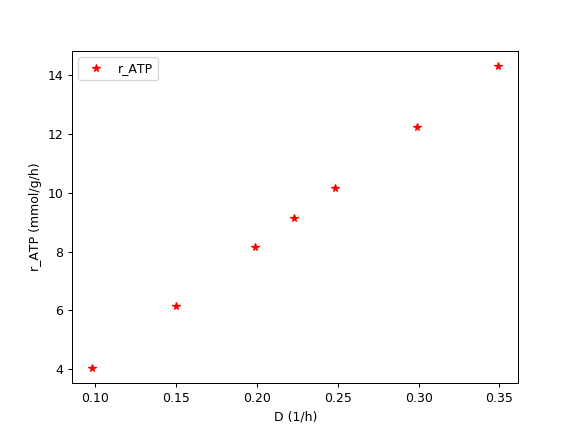

In [52]:
plt.figure(1)
plt.plot(D, rATP, 'r*', label = 'r_ATP')
plt.xlabel('D (1/h)')
plt.ylabel('r_ATP (mmol/g/h)')
plt.legend(loc = 'best')
plt.savefig('Chemostat/Aon 1998/r_ATP vs D.png', dpi = 300)
plt.show()

In [53]:
# plt.figure(2)
# plt.plot(D, rE, 'b*')
# plt.show()

In [54]:
rlys = []
for i in range(0, len(D)):
    mu = D[i]
    S = np.matrix([[-1, 1 + alpha, 1,   1,    0,    0,   0],
                   [0,  0,         0,   -1,   1,    3/2, 0],
                   [0,  beta,      2,   0,    -1/3, 0,   -2],
                   [0,  -gamma[i],    2/3, -1/3, 0,    1,   2*PO],
                   [0,  1,         0,   0,    0,    0,   0],
                   [0,  0,         0,   0,    0,    1,   0],
                   [0,  0,         0,   0,    1,    0,   0]])

    C = np.array([0, 0, 0, theta, mu, rE[i], 0]).T
    r = np.linalg.solve(S, C)
    rlys.append(r)
r = np.array(rlys)
rO = r[:,6]*1000/MMX #mmol/g/h
rC = (alpha*r[:,1] + r[:,2] + 1/2*r[:,5])*1000/MMX #mmol/g/h

<IPython.core.display.Javascript object>


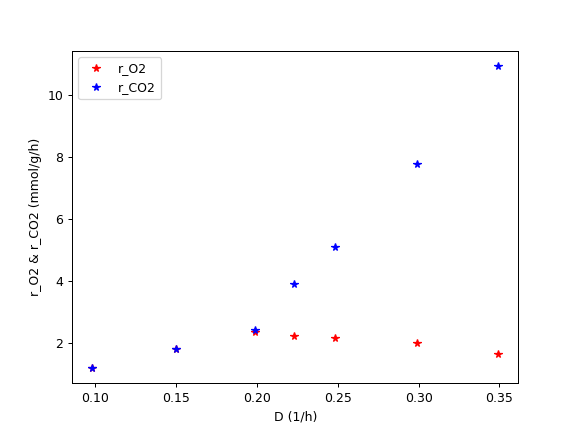

In [55]:
plt.figure(3)
plt.plot(D, rO, 'r*', label = 'r_O2')
plt.plot(D, rC, 'b*', label = 'r_CO2')
plt.xlabel('D (1/h)')
plt.ylabel('r_O2 & r_CO2 (mmol/g/h)')
plt.legend(loc = 'best')
plt.savefig('Chemostat/Aon 1998/r_O2 & r_CO2 vs D.png', dpi = 300)
plt.show()

In [56]:
df1 = pandas.DataFrame({'D': D,
                        'c_X': cX*MMX,
                        'r_E': rE*23/MMX,
                        'r_ATP': rATP,
                        'r_O2': rO,
                        'r_CO2': rC})

df1.to_csv('Aon 1998.csv')

In [57]:
# from openpyxl import load_workbook

# book = load_workbook('Results.xlsx')
# writer = pandas.ExcelWriter('Results.xlsx', engine='openpyxl') 
# writer.book = book
# writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

# data_filtered.to_excel(writer, "Main", cols=['Diff1', 'Diff2'])

# writer.save()